In [4]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
def getData(cfileName):
    """
    Given a name of a *.cfile, this function extracts the interleaved
    Inphase-Quadrature data samples and convert it into a numpy array of complex
    data elements. *.cfile format has interleaved I and Q samples where each sample
    is a float32 type. GNURadio Companion (GRC) scripts output data into a file
    though a file sink block in this format.
    Read more in SDR data types: https://github.com/miek/inspectrum
    """
    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")
    # print(data[0],data[1],data[2])
    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    # print("data type=", type(data))
    # Return the complex numpy array.
    return data

[-0.015625  -0.0234375 -0.0234375 ... -0.0234375 -0.015625  -0.015625 ]


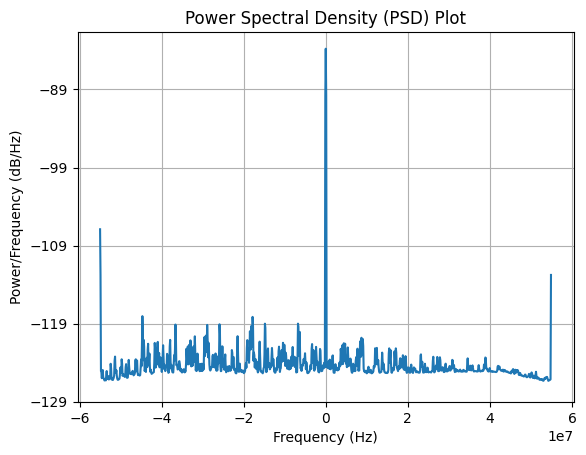

In [ ]:
data = getData("../dataset/tcp_all_1/tcp_all_1_freq=110.0em_capture.cfile")

f, Pxx = plt.psd(data, NFFT=1024, Fs=110e6)  # Adjust NFFT and Fs as needed
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD) Plot')
plt.show()

# fig = plt.figure()
# pxx, freq, t, cax = plt.specgram(data, NFFT=4096, Fs=110e6, mode='magnitude')
# fig.colorbar(cax).set_label('Intensity [dB]')
# plt.xlabel("Time (s)")
# plt.ylabel("Frequency (Hz)")
# plt.show()

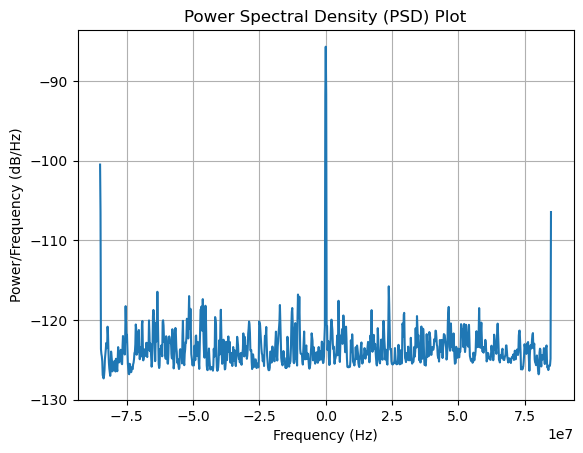

In [13]:
data = getData("../dataset/udp_all_1/udp_all_1_freq=170.0em_capture.cfile")

f, Pxx = plt.psd(data, NFFT=1024, Fs=170e6)  # Adjust NFFT and Fs as needed
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectral Density (PSD) Plot')
plt.show()


In [7]:
# fig = plt.figure()
# plt.psd(tcp_all_1_freq110_Data, NFFT=2048, Fs=110e6)
# plt.show()
# del data

[-0.015625  -0.015625  -0.0078125 ... -0.015625  -0.0078125 -0.015625 ]


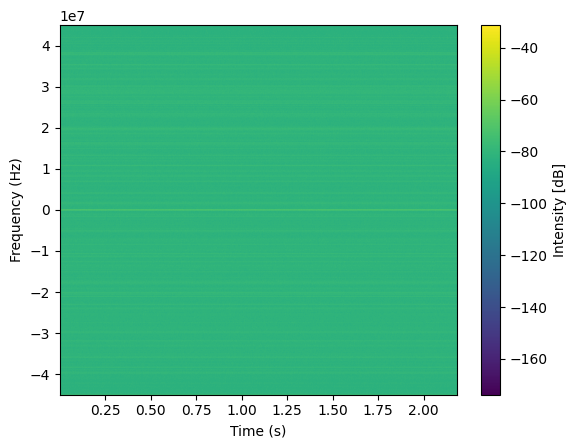

In [18]:
data = getData("../dataset/udp_all_1/udp_all_1_freq=90.0em_capture.cfile")

fig = plt.figure()
pxx, freq, t, cax = plt.specgram(data, NFFT=1024*4, Fs=90e6, mode='magnitude')
fig.colorbar(cax).set_label('Intensity [dB]')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

Trying plot cross correlation

In [6]:
## Importing dataset

def loadData(type="udp", payload=1):
    flag = None
    if type == "udp":
        if payload == 1:
            flag = "udp_all_1"
        else:
            flag = "udp_all_0"
    else:
        if payload == 1:
            flag = "tcp_all_1"
        else:
            flag = "tcp_all_0"

    dataSet = []
    for i in range(30,170,20):
        data = getData(f"../dataset/{flag}/{flag}_freq={i}.0em_capture.cfile")
        dataSet.append(data)

    # print(dataSet)
    return dataSet

In [3]:
dataSet = loadData("udp", 1)

# Initialize a list to store cross-correlation results
cross_correlation_results = []

# Loop over all pairs of datasets
for i in range(len(dataSet)):
    for j in range(i + 1, len(dataSet)):
        # Compute cross-correlation between the datasets
        cross_corr = np.correlate(dataSet[i], dataSet[j], mode='full')
        
        # Append the cross-correlation result to the list
        cross_correlation_results.append(cross_corr)

# Convert the list of cross-correlation results to a numpy array
cross_correlation_results = np.array(cross_correlation_results)
print(cross_correlation_results)

NameError: name 'getData' is not defined

In [7]:
## Importing dataset

def loadData(type="tcp", payload=0):
    flag = None
    if type == "udp":
        if payload == 1:
            flag = "udp_all_1"
        else:
            flag = "udp_all_0"
    else:
        if payload == 1:
            flag = "tcp_all_1"
        else:
            flag = "tcp_all_0"

    dataSet = []
    for i in range(30,120,20):
        data = getData(f"../dataset/{flag}/{flag}_freq={i}.0em_capture.cfile")
        dataSet.append(data)

    # print(dataSet)
    return dataSet


def loadDataOne(type, payload, freq):
  if type == "udp":
      if payload == 1:
          flag = "udp_all_1"
      else:
          flag = "udp_all_0"
  else:
      if payload == 1:
          flag = "tcp_all_1"
      else:
          flag = "tcp_all_0"

  print(f"Loaded {flag} {freq}.0MHz")
  return getData(f"../dataset/{flag}/{flag}_freq={freq}.0em_capture.cfile")


In [1]:
freqs = [e for e in range(30,111,20)]
nFreqs = len(freqs)

# Initialize a list to store cross-correlation results
cross_correlation_results = []

# Loop over all pairs of datasets
for i in range(nFreqs):
    dataSetI = loadDataOne("tcp", 0, freqs[i])
    for j in range(i + 1, nFreqs):
        dataSetJ = loadDataOne("tcp", 0, freqs[j])

        # Ensure datasets have the same length by truncating the longer dataset
        min_length = min(len(dataSetI), len(dataSetJ))
        dataSetI = dataSetI[:min_length]
        dataSetJ = dataSetJ[:min_length]
   
        # Compute cross-correlation between the datasets
        # cross_corr = np.correlate(dataSetI, dataSetJ, mode='full')
        # Compute cross-correlation between the datasets
        lags, cross_corr = plt.xcorr(dataSetI, dataSetJ, maxlags=None, normed=True)
        
        # Append the cross-correlation result to the list
        cross_correlation_results.append(cross_corr)

# Convert the list of cross-correlation results to a numpy array
cross_correlation_results = np.array(cross_correlation_results)
print(cross_correlation_results)

NameError: name 'loadDataOne' is not defined

In [ ]:
dataSet = loadDataOne("tcp", 0, 50)
pattern = np.fft.fft(dataSet)

In [ ]:
freqs = [e for e in range(30,111,20)]
nFreqs = len(freqs)

# Initialize a list to store cross-correlation results
cross_correlation_results = []

# Loop over all pairs of datasets
for i in range(nFreqs):
    dataSetI = loadDataOne("tcp", 0, freqs[i])
    for j in range(i + 1, nFreqs):
        dataSetJ = loadDataOne("tcp", 0, freqs[j])

        # Ensure datasets have the same length by truncating the longer dataset
        min_length = min(len(dataSetI), len(dataSetJ), 50000)

        dataSetI = dataSetI[:min_length]
        dataSetJ = dataSetJ[:min_length]

        # Compute cross-correlation between the datasets
        lags, cross_corr, _, _ = plt.xcorr(dataSetI, dataSetJ, maxlags=None, normed=True)

        
        # Append the cross-correlation result to the list
        cross_correlation_results.append(cross_corr)

        break

    break

# Convert the list of cross-correlation results to a numpy array
cross_correlation_results = np.array(cross_correlation_results)
print(cross_correlation_results)